# Task 1- Data Quality Assessment from 3 dataset

**Assessment of data quality and completeness in preparation for analysis.**

**Goals:**
**evaluate the quality of the data and determine its completeness in order to prepare it for further analysis. By conducting an assessment of data quality, any potential issues or inaccuracies can be identified and addressed.** Simultaneously, checking data completeness ensures that all required information is available for a comprehensive analysis, enabling researchers or analysts to draw reliable and meaningful conclusions from the data. The ultimate objective is to ensure that the data is reliable, accurate, and adequate for the intended analytical purposes.






**The client provided KPMG with 3 datasets:**

1.Customer Demographic

2.Customer Addresses

3.Transactions data in the past 3 months

### Load 3 Dataset 

In [1]:
# import dataset
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.ExcelFile("kpmg_1.xlsx")

In [3]:
Transactions = pd.read_excel(data, 'Transactions')
NewCustomerList = pd.read_excel(data, 'NewCustomerList')
CustomerDemographic = pd.read_excel(data, 'CustomerDemographic')
CustomerAddress = pd.read_excel(data, 'CustomerAddress')

# A. Transcations

###  1. EDA of Transaction 

In [6]:
#Checking Data Type and Unique values
Transactions.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [7]:
Transactions.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [9]:
#Checking the shape of the data
Transactions.shape

(20000, 13)

In [11]:
# Checking unique value from each columns
for col in Transactions.columns:
    print("{} have {} unique values: {}".format(col, Transactions[col].nunique(), Transactions[col].dtypes))
    if Transactions[col].dtypes == 'int64' or Transactions[col].dtypes == 'float' or Transactions[col].dtypes == 'object':
        print("{} values: {}".format(col,Transactions[col].unique()))
        print('')

transaction_id have 20000 unique values: int64
transaction_id values: [    1     2     3 ... 19998 19999 20000]

product_id have 101 unique values: int64
product_id values: [  2   3  37  88  78  25  22  15  67  12   5  61  35  16  79  33  54  27
  82  89  64  19  72  91   1  99   0  92  14  44  76  46  55  66  81  86
  32  77  96   6  47  94  93  60  28   4  38  56  58  50  80  87  84  21
  31  62  17  73  45  49  95  18  70  26  39  36  98  75  42  20  24  53
  65  29  11  10   7  41   9  69  90  97 100  74  71  34  57  23  51  59
  63  40   8  13  30  48  68  83  43  52  85]

customer_id have 3494 unique values: int64
customer_id values: [2950 3120  402 ...  130 2789 3446]

transaction_date have 364 unique values: datetime64[ns]
online_order have 2 unique values: float64
online_order values: [ 0.  1. nan]

order_status have 2 unique values: object
order_status values: ['Approved' 'Cancelled']

brand have 6 unique values: object
brand values: ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Nor

In [12]:
# numerical data
nums_t = Transactions.loc[:, (Transactions.dtypes == 'int64') | (Transactions.dtypes == float)].columns.tolist()
print(nums_t)
print('Counts :', len(nums_t))

['transaction_id', 'product_id', 'customer_id', 'online_order', 'list_price', 'standard_cost', 'product_first_sold_date']
Counts : 7


In [14]:
# categorical data
cats_t = Transactions.loc[:, (Transactions.dtypes == object)].columns.tolist() 
print(cats_t)
print('Counts :', len(cats_t))

['order_status', 'brand', 'product_line', 'product_class', 'product_size']
Counts : 5


In [17]:
#datetime data
# Check if each column is of datetime type
date_time_columns = Transactions.select_dtypes(include=['datetime64[ns]']).columns.tolist()

# Print the datetime columns and their counts
print(date_time_columns)
print('Counts:', len(date_time_columns))


['transaction_date']
Counts: 1


 🔬**Observation & recomendations For Transactions Dataset :**
1. The dataset consists of 20000 records and 13 columns, 7 numerical data,5 categorical data, and datetime data 1.
2. transaction_id, product_id, customer_id, product_first_sold_date is recommended to be integer.
3. There are columns that are not relevant, so they need to be dropped.
 

### 2. Checking Missing Values 

In [24]:
counts = Transactions.isna().sum().sort_values(ascending=False)

# Calculate the percentages of missing values in each column
percent = round(Transactions.isna().mean() * 100, 2).sort_values(ascending=False)

# Create a DataFrame containing missing value information
df_demo_nan = pd.concat([counts, percent], axis=1, keys=['missing value counts', '%'])

# Display the DataFrame
print(df_demo_nan)

                         missing value counts     %
online_order                              360  1.80
product_first_sold_date                   197  0.98
standard_cost                             197  0.98
product_size                              197  0.98
product_class                             197  0.98
product_line                              197  0.98
brand                                     197  0.98
list_price                                  0  0.00
order_status                                0  0.00
transaction_date                            0  0.00
customer_id                                 0  0.00
product_id                                  0  0.00
transaction_id                              0  0.00


In [22]:
nan_df = Transactions[Transactions.isna().any(axis=1)]
nan_percent = round(len(nan_df)/len(Transactions)*100, 2)
print('Percentages missing value of dataset :', nan_percent, '%')

Percentages missing value of dataset : 2.77 %


**Observation & recomendations For Transactions Dataset**

Observation :
1. The feature "online_order" has 360 missing values (1.80% of the data).
2. The features "product_first_sold_date," "standard_cost," "product_size," "product_class," "product_line," and "brand" also have 197 missing values each (0.98% of the data).
3. Some other features have no missing values.

Recommendation:

1. Further examine the feature "online_order" which has a large number of missing values (1.80%) to find out the cause.
2. Look for patterns or reasons behind the missing values in "product_first_sold_date," "standard_cost," "product_size," "product_class," "product_line," and "brand," and consider data imputation techniques or filling in missing values based on certain criteria.
3. Although the percentage of missing values in the dataset (2.77%) is low, it is recommended to conduct further checks on features with missing values to ensure data quality and accuracy.

### 3. Checking Duplikat Records###

In [23]:
# checking duplicated data
Transactions.duplicated().any()

False

***🔎 Observation : There are no duplicate records***

### 4. Statisctical Summary & Checking Distribution ###

In [27]:
# numerical value
Transactions[nums_t].describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,20000.0,10000.500000,5773.647028,1.00,5000.75,10000.50,15000.25,20000.00
product_id,20000.0,45.364650,30.753590,0.00,18.00,44.00,72.00,100.00
customer_id,20000.0,1738.246050,1011.951046,1.00,857.75,1736.00,2613.00,5034.00
online_order,19640.0,0.500458,0.500013,0.00,0.00,1.00,1.00,1.00
list_price,20000.0,1107.829449,582.825242,12.01,575.27,1163.89,1635.30,2091.47
standard_cost,19803.0,556.046951,405.955660,7.21,215.14,507.58,795.10,1759.85
product_first_sold_date,19803.0,38199.776549,2875.201110,33259.00,35667.00,38216.00,40672.00,42710.00


In [29]:
# categorical value
Transactions[cats_t].describe().T

,count,unique,top,freq
order_status,20000,2,Approved,19821
brand,19803,6,Solex,4253
product_line,19803,4,Standard,14176
product_class,19803,3,medium,13826
product_size,19803,3,medium,12990


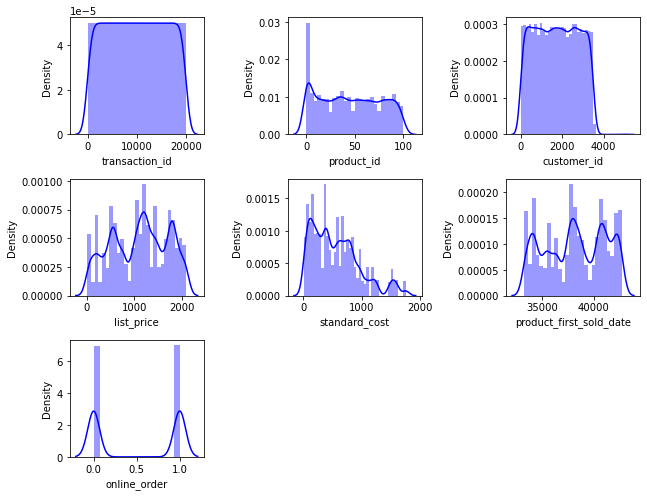

In [38]:
# distribution numerical data
nums_t = ['transaction_id', 'product_id', 'customer_id', 'list_price','standard_cost','product_first_sold_date', 'online_order']
plt.figure(figsize=(9, 7))
for i in range(0, len(nums_t)):
    plt.subplot(3, 3, i+1)
    sns.distplot(Transactions[nums_t[i]], color='blue')
    plt.tight_layout()

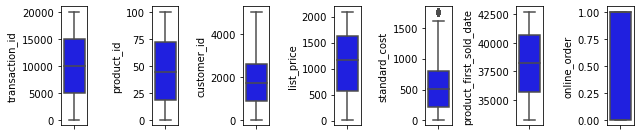

In [40]:
# distribution numerical data and check outlier
plt.figure(figsize=(9, 2))
for i in range(0, len(nums_t)):
    plt.subplot(1, len(nums_t), i+1)
    sns.boxplot(y=Transactions[nums_t[i]], color='blue', orient='v')
    plt.tight_layout()

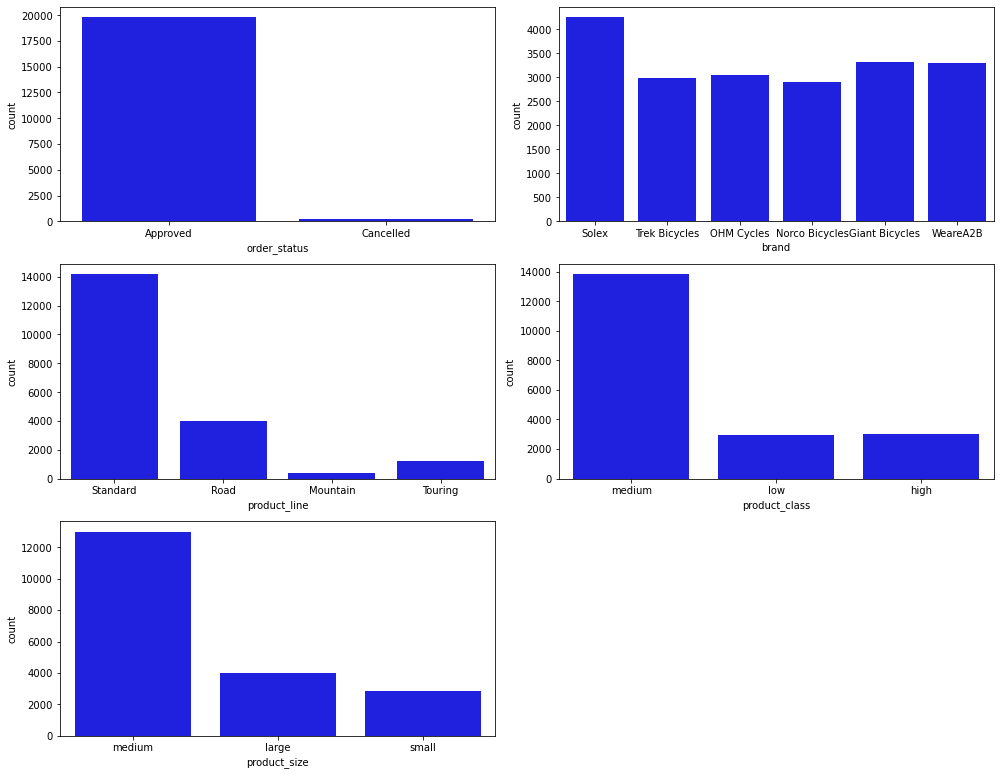

In [42]:
plt.figure(figsize=(14, 14))
for i in range(0, len(cats_t)):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=Transactions[cats_t[i]], color='Blue', orient='v')
    plt.tight_layout()

***5. Data Cleaning: Handling Missing Values***

In [43]:
Transactions.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [44]:
# drop missing value
Transactions.dropna(inplace=True)

In [45]:
# checking
Transactions.isna().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

The missing values in the dataset have been successfully addressed and resolved

In [47]:
# changing to integer
col_int = ['transaction_id', 'product_id', 'customer_id', 'product_first_sold_date']
Transactions[col_int] = Transactions[col_int].astype('int64')

In [49]:
# changing to float
Transactions['standard_cost'] = Transactions['standard_cost'].astype('float64')

In [53]:
# unix time values to datetime
import datetime as dt
Transactions['product_first_sold_date'] = pd.TimedeltaIndex(Transactions['product_first_sold_date'], unit='d') + dt.datetime(1900,1,1)

In [54]:
#sampling dataset
Transactions.sample(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
18808,18809,56,2658,2017-09-08,0.0,Approved,OHM Cycles,Standard,medium,medium,183.86,137.90,1998-12-19
1026,1027,93,2032,2017-06-23,0.0,Approved,WeareA2B,Standard,medium,medium,1065.03,230.09,2004-01-18
3429,3430,98,482,2017-02-11,1.0,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,2004-01-18
1632,1633,7,3169,2017-05-09,0.0,Approved,Trek Bicycles,Road,low,medium,980.37,234.43,2005-12-09
15603,15604,37,3258,2017-07-11,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-12-06
9008,9009,1,1969,2017-10-30,1.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,2003-02-09
1087,1088,68,2678,2017-07-21,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,2010-08-22
8578,8579,76,411,2017-06-26,0.0,Approved,WeareA2B,Road,low,small,1172.78,1043.77,2002-10-12
9952,9953,86,2686,2017-02-01,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2004-08-09
6369,6370,41,609,2017-03-14,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,1997-05-12


In [58]:
Transactions['online_order'] = Transactions['online_order'].astype('object')


In [59]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  object        
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [141]:
Transactions.to_csv('Trans_CLEAN.csv', index=False)

# B. Customer Demographic

### 1. EDA of Customer Demographic 

In [61]:
CustomerDemographic.sample(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
2153,2154,Bird,Bolf,Female,86,1980-01-08,Chemical Engineer,Manufacturing,High Net Worth,N,ÅâÂ´â°ËÃÂ¨ËÃâââ,No,6.0
175,176,Angelo,Clayal,Male,39,1992-04-13,Accountant I,Property,Mass Customer,N,<script>alert('hi')</script>,No,10.0
465,466,Jarad,Bauser,Male,84,1991-01-27,NaN,Manufacturing,Affluent Customer,N,0,Yes,2.0
3536,3537,Sholom,Pavlasek,Male,1,1997-01-15,Graphic Designer,Financial Services,Mass Customer,N,-100,No,4.0
138,139,Gar,NaN,Male,1,1964-07-28,Operator,Telecommunications,Affluent Customer,N,-100,No,4.0
10,11,Uriah,Bisatt,Male,99,1954-04-30,NaN,Property,Mass Customer,N,ÅâÂ´Â®â Â¥Â¨ËÃ¸Ïââ,No,9.0
3534,3535,Bren,Dabbes,Female,8,1994-09-15,Technical Writer,Manufacturing,High Net Worth,N,Ù¡Ù¢Ù£,No,6.0
2551,2552,Allard,Skipton,Male,1,1973-11-02,NaN,Manufacturing,Affluent Customer,N,(ï½¡â â âï½¡),Yes,17.0
3732,3733,Shelden,Rodenburg,Male,70,1977-11-01,NaN,NaN,Mass Customer,N,â°â´âµ,No,11.0
3950,3951,Ephrem,Hollerin,Male,39,1975-02-10,Quality Control Specialist,NaN,Affluent Customer,N,ãã¼ãã£ã¼ã¸è¡ããªãã,Yes,9.0


In [62]:
# checking shape
CustomerDemographic.shape

(4000, 13)

In [63]:
# checking dataset info
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [65]:
# Checking unique value from each columns
for col in CustomerDemographic.columns:
    print("{} have {} unique values: {}".format(col, CustomerDemographic[col].nunique(), CustomerDemographic[col].dtypes))
    if CustomerDemographic[col].dtypes == 'int64' or CustomerDemographic[col].dtypes == 'float' or CustomerDemographic[col].dtypes == 'object':
        print("{} values: {}".format(col,CustomerDemographic[col].unique()))
        print('')

customer_id have 4000 unique values: int64
customer_id values: [   1    2    3 ... 3998 3999 4000]

first_name have 3139 unique values: object
first_name values: ['Laraine' 'Eli' 'Arlin' ... 'Stephie' 'Rusty' 'Sarene']

last_name have 3725 unique values: object
last_name values: ['Medendorp' 'Bockman' 'Dearle' ... 'Halgarth' 'Woolley' 'Oldland']

gender have 6 unique values: object
gender values: ['F' 'Male' 'Female' 'U' 'Femal' 'M']

past_3_years_bike_related_purchases have 100 unique values: int64
past_3_years_bike_related_purchases values: [93 81 61 33 56 35  6 31 97 49 99 58 38 85 91 57 79 76 72 74 43 55 12 37
  5 62 18  3 17 44 59 40 46 64 24 63 98 51 68 22  2 48 87 26 60 47 73 21
 67 16 78 30 94 28 20 11  1 75 41 69 19 80 83 25 54  4 23 65 88 10 77  9
 82 27 53 32 34 71 36 90 95  8 39  7 42 13 45 50 14 89 84 96 70 66  0 15
 86 92 29 52]

DOB have 3448 unique values: datetime64[ns]
job_title have 195 unique values: object
job_title values: ['Executive Secretary' 'Administrative Of

In [66]:
# numerical data
nums = CustomerDemographic.loc[:, (CustomerDemographic.dtypes == 'int64') | (CustomerDemographic.dtypes == float)].columns.tolist()
print(nums)
print('Counts :', len(nums))

['customer_id', 'past_3_years_bike_related_purchases', 'tenure']
Counts : 3


In [67]:
# categorical data
cats = CustomerDemographic.loc[:, (CustomerDemographic.dtypes == object)].columns.tolist() 
print(cats)
print('Counts :', len(cats))

['first_name', 'last_name', 'gender', 'job_title', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'default', 'owns_car']
Counts : 9


In [68]:
#datetime data
# Check if each column is of datetime type
date_time_columns = CustomerDemographic.select_dtypes(include=['datetime64[ns]']).columns.tolist()

# Print the datetime columns and their counts
print(date_time_columns)
print('Counts:', len(date_time_columns))


['DOB']
Counts: 1


 **Observation :**
1. The dataset contains 4000 records and 13 columns, out of which 3 columns are numerical, datetime 1, and 9 columns are categorical.
2. The "tenure" column should be of integer data type.
3. There are some irrelevant columns, such as "default," which should be dropped from the dataset.
4. The "gender" column has inconsistent values that need to be addressed and treated.

### 2. Checking Missing Values 

In [71]:
# percentages missing value of dataset
nan_df = CustomerDemographic[CustomerDemographic.isna().any(axis=1)]
nan_percent = round(len(nan_df)/len(CustomerDemographic)*100, 2)
print('Percentages missing value of dataset CustomerDemographic :', nan_percent, '%')

Percentages missing value of dataset CustomerDemographic : 34.25 %


In [73]:
# checking missing value of each columns
counts = CustomerDemographic.isna().sum().sort_values(ascending=False)

# percentages of missing value
percent = round(CustomerDemographic.isna().mean()*100, 2).sort_values(ascending=False)

# create dataframe of missing value
df_cusdemo = pd.concat([counts,percent], axis=1, keys=['missing value counts', '%'])
df_cusdemo

,missing value counts,%
job_industry_category,656,16.40
job_title,506,12.65
default,302,7.55
last_name,125,3.12
tenure,87,2.17
DOB,87,2.17
owns_car,0,0.00
deceased_indicator,0,0.00
wealth_segment,0,0.00
past_3_years_bike_related_purchases,0,0.00


***Observation:***

1. The dataset "CustomerDemographic" has 656 missing values (16.40%) in the column "job_industry_category."
2. The "job_title" column has 506 missing values (12.65%).
3. There are 302 missing values (7.55%) in the column "default."
4. The "last_name" and "tenure" columns have 125 missing values (3.12% and 2.17%) respectively.

Recommendation: 

The high percentage of missing values (34.25%) indicates that the "CustomerDemographic" dataset has significant data issues. It is recommended to address these missing values appropriately in order to improve data quality and reliability in subsequent analysis or modelling.

In [74]:
# checking duplicated data
CustomerDemographic.duplicated().any()

False

*** Observation*** : no duplicate data

**4. Statisctical Summary & Checking Distribution**

In [75]:
# numerical value
CustomerDemographic[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,4000.0,2000.500000,1154.844867,1.0,1000.75,2000.5,3000.25,4000.0
past_3_years_bike_related_purchases,4000.0,48.890000,28.715005,0.0,24.00,48.0,73.00,99.0
tenure,3913.0,10.657041,5.660146,1.0,6.00,11.0,15.00,22.0


In [76]:
CustomerDemographic[cats].describe().T

,count,unique,top,freq
first_name,4000,3139,Timmie,5
last_name,3875,3725,Pristnor,3
gender,4000,6,Female,2037
job_title,3494,195,Business Systems Development Analyst,45
job_industry_category,3344,9,Manufacturing,799
wealth_segment,4000,3,Mass Customer,2000
deceased_indicator,4000,2,N,3998
default,3698,90,100,113
owns_car,4000,2,Yes,2024


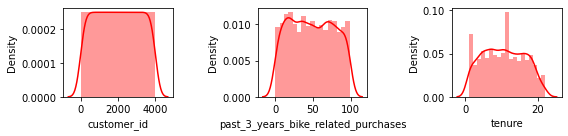

In [80]:
# distribution numerical data
plt.figure(figsize=(8, 2))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.distplot(CustomerDemographic[nums[i]], color='red')
    plt.tight_layout()

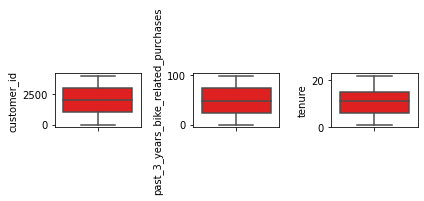

In [81]:
# distribution numerical data and check outlier
plt.figure(figsize=(6, 2))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=CustomerDemographic[nums[i]], color='red', orient='v')
    plt.tight_layout()

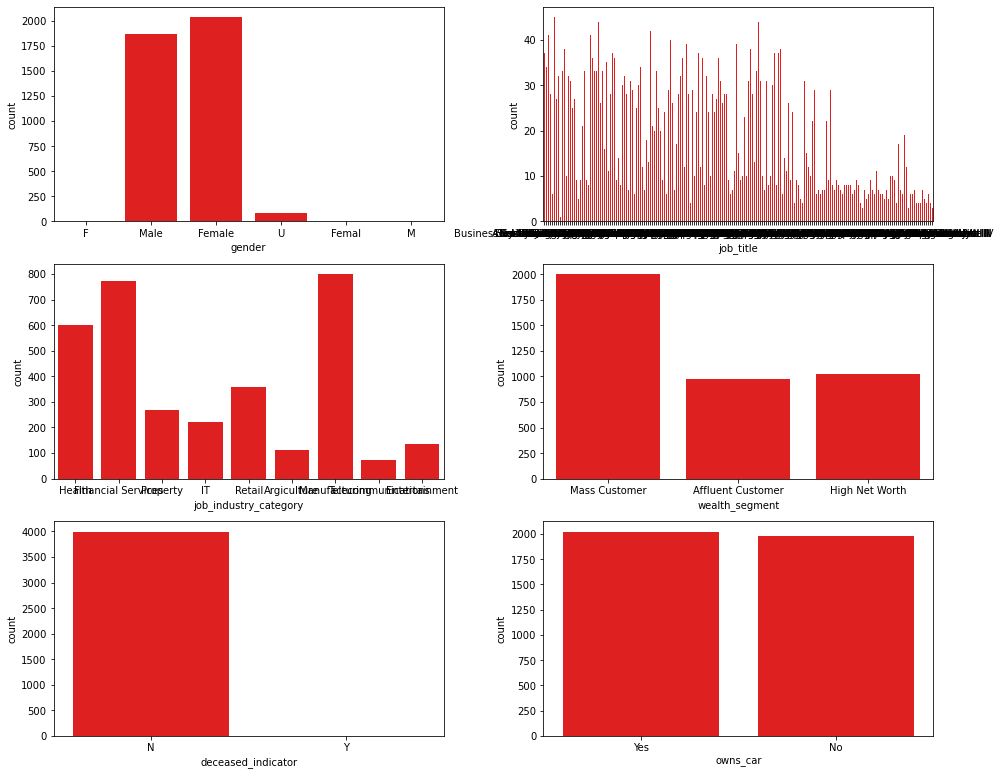

In [82]:
cats = ['gender', 'job_title', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car']
plt.figure(figsize=(14, 14))
for i in range(0, len(cats)):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=CustomerDemographic[cats[i]], color='red', orient='v')
    plt.tight_layout()

**Observation:**

1. The data shows a normal distribution, indicating that most values in the dataset are evenly distributed around the mean or average. This is a common pattern in natural phenomena and makes data analysis more straightforward due to its mathematical properties.

2. There are no outliers or unusual records present in the dataset. Outliers are values that significantly deviate from the rest of the data points. The absence of outliers suggests that the data is consistent and reliable for analysis.

***5. Data Cleaning: Handling Missing Values***

In [87]:
# crete copy of dataset
cusdm = CustomerDemographic.copy()
# drop columns
cusdm.drop(columns=['default'], inplace=True)
cusdm.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

In [88]:
cusdm.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [89]:
 # filling nan in last name with first name
cusdm['last_name'].fillna(cusdm['first_name'], inplace=True)

In [90]:
cusdm['job_title'].value_counts()

Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Staff Accountant I                       4
Research Assistant III                   3
Health Coach I                           3
Health Coach III                         3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [91]:
cusdm['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [92]:
# filling nan with previous value
fill = ['job_title','job_industry_category']

for x in fill:
    cusdm[x].fillna(method='pad',inplace=True)

In [93]:
cusdm['DOB'].fillna(method='pad',inplace=True)

In [94]:
cusdm['tenure'].fillna(method='pad',inplace=True)

In [95]:
cusdm.isna().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

The dataset has been cleared of missing values

In [96]:
# checking value counts gender
cusdm['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
M            1
Femal        1
Name: gender, dtype: int64

In [97]:
# fixing inconsitency value
cusdm.replace(to_replace= ['F', 'Femal', 'U'], value = 'Female', inplace=True)
cusdm.replace(to_replace= ['M'], value = 'Male', inplace=True)

In [98]:
# checking value counts gender
cusdm['gender'].value_counts()

Female    2127
Male      1873
Name: gender, dtype: int64

In [99]:
cusdm['tenure'] = cusdm['tenure'].astype('int64')

In [110]:
# sampling
cusdm.sample(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age_c
1786,1787,Tull,Godehard.sf,Male,2,1976-11-21,Executive Secretary,Retail,High Net Worth,N,Yes,13,50
3466,3467,Killy,Spaducci,Male,31,1980-05-20,VP Quality Control,IT,Mass Customer,N,No,21,40
3504,3505,Dolly,Scallan,Female,41,1974-08-06,Business Systems Development Analyst,Retail,Mass Customer,N,No,14,50
1532,1533,Sonia,Rous,Female,59,1977-07-02,Social Worker,Health,Affluent Customer,N,Yes,8,50
1814,1815,Bab,Bingall,Female,23,1954-03-26,Software Test Engineer I,Argiculture,Mass Customer,N,Yes,19,70
1132,1133,Forrester,McFetridge,Male,88,1968-01-26,Actuary,Manufacturing,Affluent Customer,N,No,6,60
3501,3502,Wilfrid,Cleaves,Male,5,1997-10-16,Senior Sales Associate,Retail,High Net Worth,N,Yes,3,20
3991,3992,Germain,Tireman,Male,99,1980-04-02,Database Administrator IV,Manufacturing,Affluent Customer,N,Yes,18,40
420,421,Tish,Netti,Female,26,1999-03-19,Sales Representative,Retail,Mass Customer,N,Yes,2,20
1002,1003,Mariann,O'Geaney,Female,35,1968-02-03,Paralegal,Financial Services,High Net Worth,N,No,18,60


In [101]:
cusdm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            4000 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  4000 non-null   datetime64[ns]
 6   job_title                            4000 non-null   object        
 7   job_industry_category                4000 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [106]:
# fixing datatype
cusdm['DOB'] = cusdm['DOB'].astype('datetime64[ns]')

In [111]:
# create function tu calculate age
from datetime import date
def calculate_age(birthdate):
    today = date.today()
    age = today.year-birthdate.year-((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

# fit into dataframe
cusdm['age']=cusdm['DOB'].apply(calculate_age)
cusdm['age_c'] = (round(cusdm['age']/ 10) * 10).astype(int)
cusdm.drop(columns='age', inplace=True)

In [112]:
# sampling
cusdm.sample(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age_c
1427,1428,Morissa,Ozintsev,Female,93,1998-11-15,Sales Representative,Retail,High Net Worth,N,No,1,20
2148,2149,Lana,Druce,Female,26,1978-05-19,Professor,Manufacturing,High Net Worth,N,No,6,40
2235,2236,Arin,Crickmoor,Male,0,1968-04-16,Data Coordiator,Manufacturing,Affluent Customer,N,Yes,13,60
2880,2881,Ezra,Steffan,Male,71,1962-09-27,Associate Professor,Health,Affluent Customer,N,Yes,11,60
1719,1720,Matilda,Milton,Female,96,1986-10-06,Staff Accountant II,Financial Services,Mass Customer,N,Yes,13,40
1674,1675,Luke,Wombwell,Male,76,1955-08-14,Engineer I,Manufacturing,Affluent Customer,N,Yes,14,70
732,733,Ham,Mayoh,Male,25,1973-11-30,Actuary,Manufacturing,Mass Customer,N,No,13,50
723,724,Heinrik,Norcock,Male,7,1975-08-05,Analog Circuit Design manager,Financial Services,Mass Customer,N,Yes,4,50
2033,2034,June,Haslam,Female,87,1974-01-10,Speech Pathologist,Manufacturing,Mass Customer,N,No,8,50
2854,2855,Kim,Tineman,Female,81,1975-09-13,Nurse Practicioner,Manufacturing,Mass Customer,N,Yes,17,50


In [140]:
cusdm.to_csv('cusdemo_CLEAN.csv', index=False)

# C. Customer Address

### 1. EDA of Customer Address

In [115]:
CustomerAddress.head(5)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [116]:
CustomerAddress.shape

(3999, 6)

In [117]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [118]:
# Checking unique value of each columns
for col in CustomerAddress.columns:
    print("{} have {} unique values: {}".format(col, CustomerAddress[col].nunique(), CustomerAddress[col].dtypes))
    if CustomerAddress[col].dtypes == 'int64' or CustomerAddress[col].dtypes == 'object':
        print("{} values: {}".format(col,CustomerAddress[col].unique()))
        print('')

customer_id have 3999 unique values: int64
customer_id values: [   1    2    4 ... 4001 4002 4003]

address have 3996 unique values: object
address values: ['060 Morning Avenue' '6 Meadow Vale Court' '0 Holy Cross Court' ...
 '87 Crescent Oaks Alley' '8194 Lien Street' '320 Acker Drive']

postcode have 873 unique values: int64
postcode values: [2016 2153 4211 2448 3216 2210 2650 2023 3044 4557 3799 2760 2428 3331
 3058 2135 2233 2444 4413 4740 3218 4868 4116 2519 2756 2170 4005 4127
 2535 4726 4805 2212 2207 3350 3931 4018 4670 2480 3212 2322 3198 2047
 4503 2145 4350 2142 2029 2127 4280 2166 2046 2026 2765 2749 2745 3752
 2217 2230 3046 3183 2070 2213 4208 2774 4133 4213 4170 2073 3561 2330
 3977 2204 2086 2226 2075 2038 2069 2100 3133 3070 2777 2125 2766 2209
 2160 2065 2150 2168 4171 2155 2517 2096 2750 2093 3204 4300 3844 4226
 3192 2485 2097 4817 2516 3074 4508 4405 2452 2205 4132 4744 2158 3201
 4178 2112 2033 4401 3186 4017 2315 2285 2219 4509 2759 2747 2227 2025
 3191 3025 2263

In [119]:
# numerical data
nums_a = CustomerAddress.loc[:, (CustomerAddress.dtypes == 'int64')].columns.tolist()
print(nums_a)
print('Counts :', len(nums_a))

['customer_id', 'postcode', 'property_valuation']
Counts : 3


In [120]:
# numerical data
cats_a = CustomerAddress.loc[:, (CustomerAddress.dtypes == 'int64')].columns.tolist()
print(cats_a)
print('Counts :', len(cats_a))

['customer_id', 'postcode', 'property_valuation']
Counts : 3


***Observation :***
1. Number of records: 3999 & Number of columns: 6
2. Column types: 3 numerical and 3 categorical
3. Data consistency issue: Inconsistent values in the "state" column
4. Data types appropriately assigned for each column
5. Data requires treatment to resolve the inconsistency in the "state" column.

Checking Missing Values

In [121]:
# percentages missing value of dataset
nan_df = CustomerAddress[CustomerAddress.isna().any(axis=1)]
nan_percent = round(len(nan_df)/len(CustomerAddress)*100, 2)
print('Percentages missing value of dataset :', nan_percent, '%')

Percentages missing value of dataset : 0.0 %


***Observation : There is no missing values***

***Checking Duplicate Records***

In [122]:
# checking duplicated data
CustomerAddress.duplicated().any()

False

***Observation : There is no duplicate data***

In [123]:
# numerical
CustomerAddress[nums_a].describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,3999.0,2003.987997,1154.576912,1.0,1004.5,2004.0,3003.5,4003.0
postcode,3999.0,2985.755939,844.878364,2000.0,2200.0,2768.0,3750.0,4883.0
property_valuation,3999.0,7.514379,2.824663,1.0,6.0,8.0,10.0,12.0


In [124]:
# numerical
CustomerAddress[cats_a].describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,3999.0,2003.987997,1154.576912,1.0,1004.5,2004.0,3003.5,4003.0
postcode,3999.0,2985.755939,844.878364,2000.0,2200.0,2768.0,3750.0,4883.0
property_valuation,3999.0,7.514379,2.824663,1.0,6.0,8.0,10.0,12.0


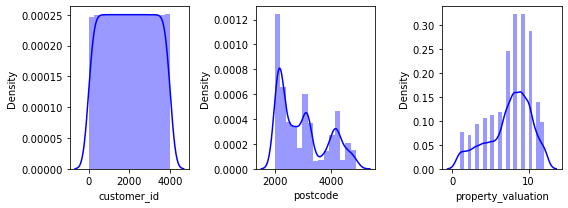

In [130]:
# distribution numerical data
plt.figure(figsize=(8, 3))
for i in range(0, len(nums_a)):
    plt.subplot(1, len(nums_a), i+1)
    sns.distplot(CustomerAddress[nums_a[i]], color='blue')
    plt.tight_layout()

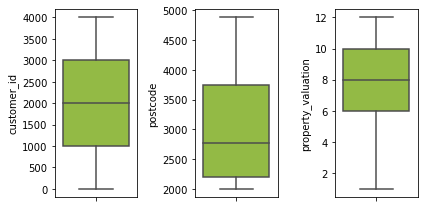

In [131]:
# distribution numerical data and check outlier
plt.figure(figsize=(6, 3))
for i in range(0, len(nums_a)):
    plt.subplot(1, len(nums_a), i+1)
    sns.boxplot(y=CustomerAddress[nums_a[i]], color='yellowgreen', orient='v')
    plt.tight_layout()

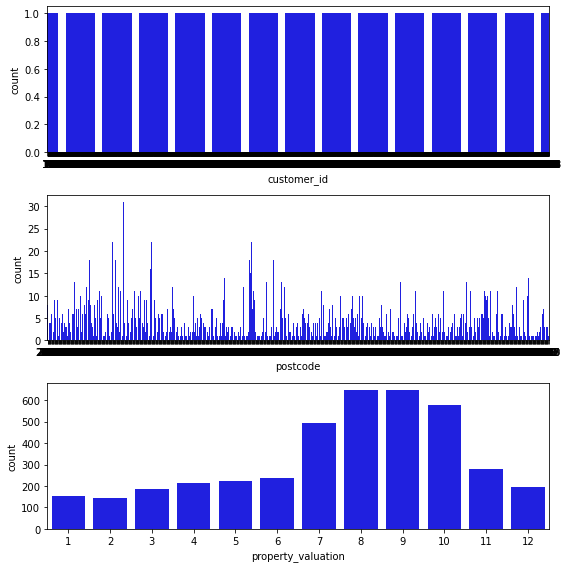

In [132]:
plt.figure(figsize=(8, 8))
for i in range(0, len(cats_a)):
    plt.subplot(3, 1, i+1)
    sns.countplot(x=CustomerAddress[cats_a[i]], color='blue', orient='v')
    plt.tight_layout()

In [133]:

CustomerAddress['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [136]:
# replace values
CustomerAddress['state'].replace(['NSW', 'VIC','QLD'], ['New South Wales', 'Victoria','Queensland'], inplace=True)

In [137]:

CustomerAddress['state'].value_counts()

New South Wales    2140
Victoria           1021
Queensland          838
Name: state, dtype: int64

In [139]:
CustomerAddress.to_csv('cusadr_CLEAN.csv', index=False)